Import the python utilities needed

In [1]:
import xarray as xr
import pandas as pd
import datetime

Open the IBTrACS dataset (from local directory)

In [2]:
data = xr.open_dataset("IBTrACS.ALL.v04r00.nc")

In [3]:
data

<xarray.Dataset>
Dimensions:           (storm: 13585, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [4]:
### create list of variables
varlist = [i for i in data.data_vars]

### For unclear reasons, subsetting the entire dataset by time then expands many of the 1-D variables into 2-D, which is not what we want. Instead, we'll create a new dataset and loop over the variables and that seems to work (though is rather slow)

In [15]:
data_new = xr.Dataset() ### initialize new dataset
for i in varlist:
    data_new[i]=data[i].where(data.season.isin ([2000]), drop=True)

In [16]:
data_new

<xarray.Dataset>
Dimensions:           (storm: 112, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 103.0 104.0 91.0 91.0 ... 23.0 48.0 61.0
    sid               (storm) object b'1999343S09095' ... b'2000364N07130'
    season            (storm) float32 2e+03 2e+03 2e+03 ... 2e+03 2e+03 2e+03
    number            (storm) float64 102.0 103.0 105.0 ... 110.0 112.0 113.0
    basin             (storm, date_time) object b'SI' b'SI' b'SI' ... b'' b''
    subbasin          (storm, date_time) object b'WA' b'WA' b'WA' ... b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 nan nan nan nan ... nan nan nan
    reunion_gust_per  (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_seahgt        (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_searad        (storm, date_time, quadrant) float32 nan nan ... nan nan
    storm_speed       (storm, date_time) float32 5.0 5.0 5.0 5.0 ... nan nan nan
    storm_dir         (storm, date_time) float32 98.0 98.0 97.0 ... nan nan nan

In [17]:
### encode the compression as in https://stackoverflow.com/questions/40766037/specify-encoding-compression-for-many-variables-in-xarray-dataset-when-write-to
comp = dict(zlib=True, complevel=5)
encoding = {var: comp for var in data_new.data_vars}
data_new.to_netcdf("data_new3.nc", encoding=encoding, engine='netcdf4')

### without compression it makes a giant file, much larger than the original:
## data_new.to_netcdf("data_new2.nc")


Example of finding the storms with a particular name and making a very simple plot of their track

In [10]:
list(data_new.name.values)

[b'NOT_NAMED',
 b'NOT_NAMED',
 b'SAM',
 b'NOT_NAMED',
 b'ANDO',
 b'BINDU',
 b'CHARLY',
 b'TERRI',
 b'NOT_NAMED',
 b'WINSOME',
 b'VINCENT',
 b'WYLVA',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'OMA',
 b'ABIGAIL',
 b'PAULA',
 b'RITA',
 b'DERA',
 b'WALTER',
 b'NOT_NAMED',
 b'EVARISTE',
 b'SOSE',
 b'NOT_NAMED',
 b'ALISTAIR',
 b'CIMARON',
 b'NOT_NAMED',
 b'ADOLPH',
 b'ALLISON',
 b'NOT_NAMED',
 b'CHEBI',
 b'BARBARA',
 b'NOT_NAMED',
 b'DURIAN',
 b'UTOR',
 b'TRAMI',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'COSME',
 b'DALILA',
 b'ERICK',
 b'KONG-REY',
 b'YUTU',
 b'TORAJI',
 b'MAN-YI',
 b'NOT_NAMED',
 b'BARRY',
 b'USAGI',
 b'PABUK',
 b'CHANTAL',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'DEAN',
 b'NOT_NAMED',
 b'WUTIP',
 b'SEPAT',
 b'FLOSSIE',
 b'FITOW',
 b'ERIN',
 b'DANAS',
 b'GIL',
 b'HENRIETTE',
 b'NARI',
 b'FELIX',
 b'NOT_NAMED',
 b'IVO',
 b'GABRIELLE',
 b'VIPA',
 b'FRANCISCO',
 b'NOT_NAMED',
 b'JULIETTE',
 b'LEKIMA',
 b'KIKO',
 b'HUMBERTO',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'LORENA',
 b'KROSA',
 b'NOT_NAMED',
 b'NOT_NAM

In [12]:
andrea = data_new.where(data_new.name==b'ANDREA', drop=True)

In [13]:
andrea.season

<xarray.DataArray 'season' (storm: 3)>
array([2007., 2013., 2019.], dtype=float32)
Dimensions without coordinates: storm
Attributes:
    long_name:              Season
    units:                  Year
    description:            Season when storm started
    coverage_content_type:  physicalMeasurement

Text(0.5, 1.0, 'ANDREA 2007')

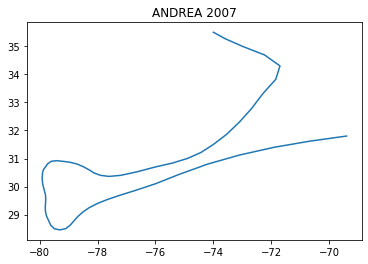

In [60]:
import matplotlib.pyplot as plt

this_storm = andrea.where(andrea.season==2007, drop=True).squeeze()

## track of this storm 
plt.plot(this_storm.lon, this_storm.lat)
plt.title(str(this_storm.name.astype(str).values)+" "+str(int(this_storm.season.values)))

In [61]:
### the storm names are encoded weirdly, need to convert to string:
str(this_storm.name.astype(str).values)

'ANDREA'

In [62]:
### and the season is a float, so change to int and then to string
str(int(this_storm.season.values))

'2007'